<a href="https://colab.research.google.com/github/timus1424/ashborn-/blob/main/ashborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D-1**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
x = np.array([0,1,2,4,7,9,13])
y = np.array([5,20,23,45,65,78,99])

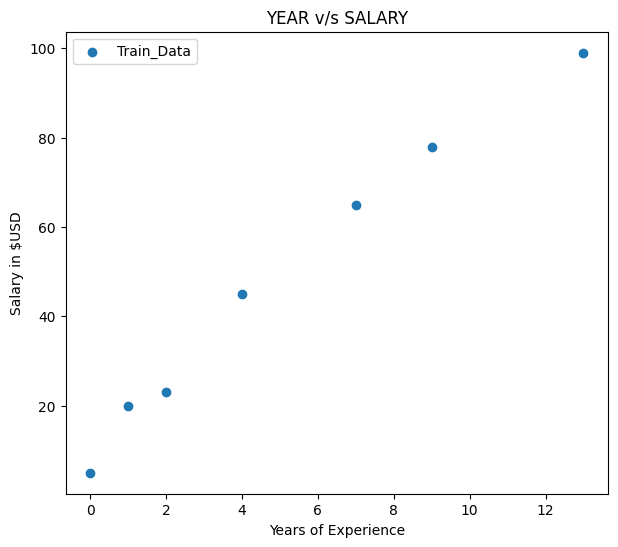

In [18]:
plt.figure(figsize=(7,6))
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $USD')
plt.title('YEAR v/s SALARY')
plt.scatter(x,y)
plt.legend(['Train_Data'])
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=x.reshape(-1,1)
model.fit(x,y)

LinearRegression()

In [20]:
predicted_value= model.predict(x)

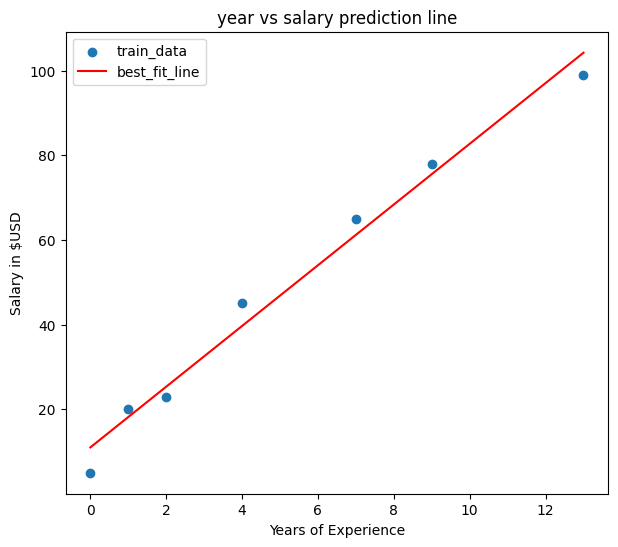

In [21]:
plt.figure(figsize=(7,6))
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $USD')
plt.title('year vs salary prediction line')
plt.scatter(x,y)
plt.plot(x,predicted_value,color='red')
plt.legend(['train_data','best_fit_line'])
plt.show()

In [22]:
model.intercept_

10.974576271186436

In [23]:
model.coef_

array([7.17161017])

In [24]:
years = 8.5
print('predicted_value = ',model.predict([[years]]))

predicted_value =  [71.93326271]


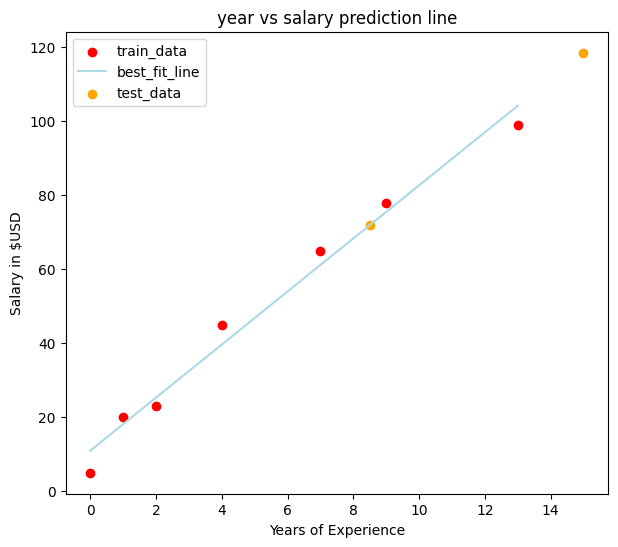

In [25]:
plt.figure(figsize=(7,6))
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $USD')
plt.title('year vs salary prediction line')
plt.scatter(x,y,color='red')
plt.plot(x,predicted_value,color='lightblue')
x_test = np.array([8.5,15])
plt.scatter(x_test,model.predict(x_test.reshape(-1,1)),color='orange')
plt.legend(['train_data','best_fit_line','test_data'])
plt.show()

              Artificial Intelligence
Machine Learning                    Deep Learning

h -> hypothesis

h thetanot = Thetanot 0 + thetanot1 x1 + ... + thetanotn xn



#D-2


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [29]:
df.shape

(1067, 13)

In [30]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [32]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [33]:
d=df['MAKE'].unique()
d = {vehicle: index for index, vehicle in enumerate(d)}

In [34]:
#Data Mapping
df['MAKE'] = df['MAKE'].map(d)

In [35]:
df.head(100)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,0,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,0,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,0,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,0,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,4,435i COUPE,COMPACT,3.0,6,M6,Z,11.8,7.9,10.0,28,230
96,2014,4,435i xDRIVE COUPE,COMPACT,3.0,6,A8,Z,11.7,7.8,9.9,29,228
97,2014,4,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
98,2014,4,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202


In [36]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,0,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,0,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,0,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,0,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
d=df['MODEL'].unique()

In [38]:
d= {vehicle: index for index, vehicle in enumerate(d)}

In [39]:
#Data Mapping
df['MODEL'] = df['MODEL'].map(d)

In [40]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,0,0,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,0,1,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,0,2,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,0,3,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [41]:
d=df['VEHICLECLASS'].unique()

In [42]:
d = {vehicle: index for index, vehicle in enumerate(d)}

In [43]:
#Data Mapping
df['TRANSMISSION'] = df['TRANSMISSION'].map(d)

In [44]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,0,COMPACT,2.0,4,NaN,Z,9.9,6.7,8.5,33,196
1,2014,0,0,COMPACT,2.4,4,NaN,Z,11.2,7.7,9.6,29,221
2,2014,0,1,COMPACT,1.5,4,NaN,Z,6.0,5.8,5.9,48,136
3,2014,0,2,SUV - SMALL,3.5,6,NaN,Z,12.7,9.1,11.1,25,255
4,2014,0,3,SUV - SMALL,3.5,6,NaN,Z,12.1,8.7,10.6,27,244


In [45]:
d=df['TRANSMISSION'].unique()

In [46]:
d = {vehicle: index for index, vehicle in enumerate(d)}

In [47]:
#Data Mapping
df['TRANSMISSION'] = df['TRANSMISSION'].map(d)

In [48]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,0,COMPACT,2.0,4,0,Z,9.9,6.7,8.5,33,196
1,2014,0,0,COMPACT,2.4,4,0,Z,11.2,7.7,9.6,29,221
2,2014,0,1,COMPACT,1.5,4,0,Z,6.0,5.8,5.9,48,136
3,2014,0,2,SUV - SMALL,3.5,6,0,Z,12.7,9.1,11.1,25,255
4,2014,0,3,SUV - SMALL,3.5,6,0,Z,12.1,8.7,10.6,27,244


In [49]:
df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [50]:
d1 = {'Z':0,'D':1,'X':2,'E':3}

In [51]:
#Data Mapping
df['FUELTYPE'] = df['FUELTYPE'].map(d1)

visulizing data

In [52]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,0,COMPACT,2.0,4,0,0,9.9,6.7,8.5,33,196
1,2014,0,0,COMPACT,2.4,4,0,0,11.2,7.7,9.6,29,221
2,2014,0,1,COMPACT,1.5,4,0,0,6.0,5.8,5.9,48,136
3,2014,0,2,SUV - SMALL,3.5,6,0,0,12.7,9.1,11.1,25,255
4,2014,0,3,SUV - SMALL,3.5,6,0,0,12.1,8.7,10.6,27,244


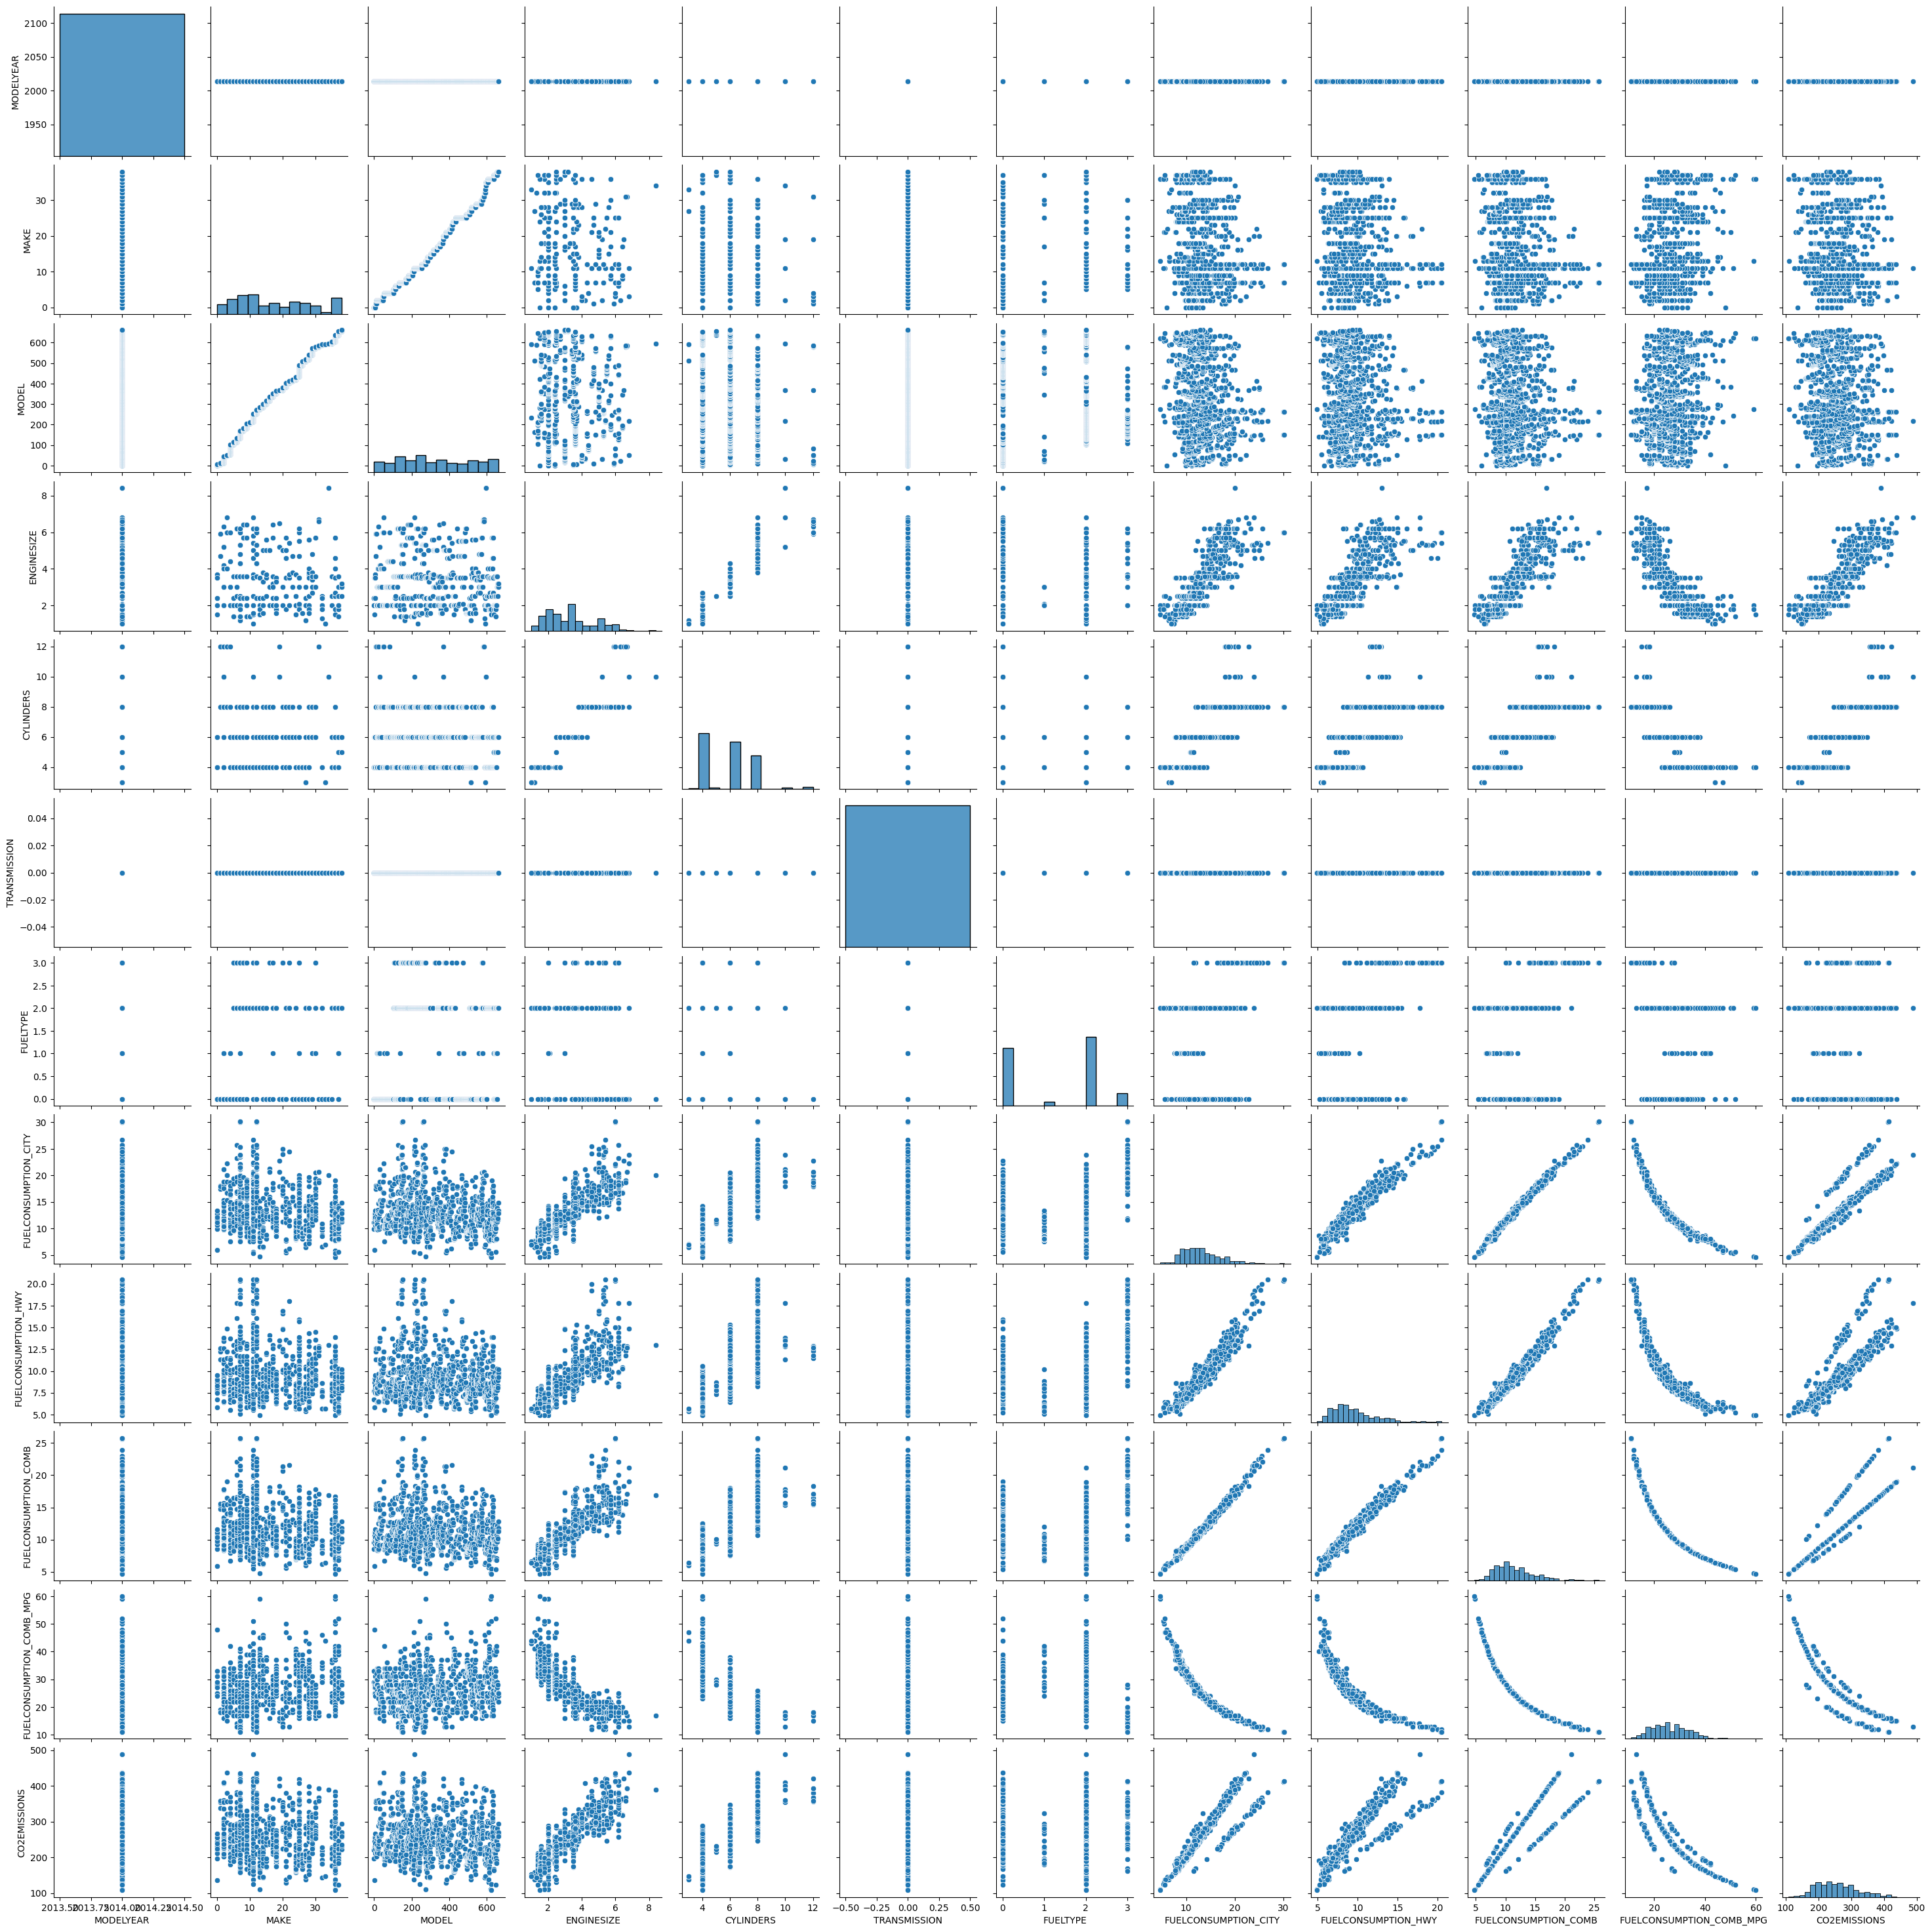

In [53]:
import seaborn as sns
# Pairplot to check relations
sns.pairplot(df)
plt.show()

In [54]:
# Correlation matrix to understand linear relationships
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'COMPACT'

<Figure size 1000x600 with 0 Axes>

In [55]:
#cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY']]
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


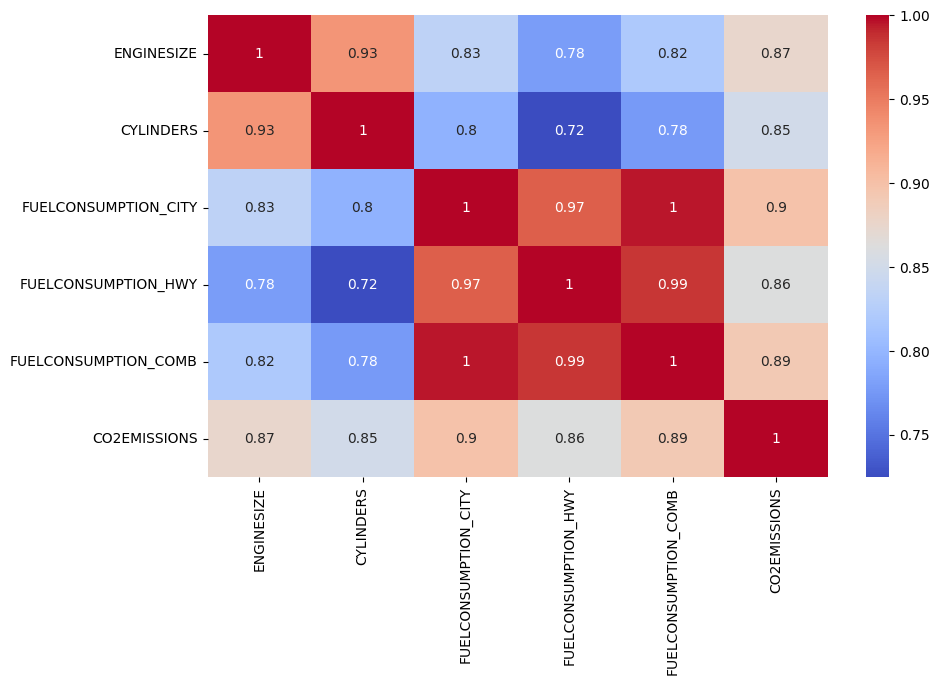

In [56]:
# Correlation matrix to understand linear relationships
plt.figure(figsize=(10,6))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm')
plt.show()

#legend
+1 -> directly proportional;
 0 -> no change;
-1 -> inversely proportional;

In [57]:
#x=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
x=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y=cdf[['CO2EMISSIONS']]

In [58]:
cdf.shape

(1067, 6)

In [59]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [62]:
y_predicted=model.predict(x_test)
#print(y_predicted)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_predicted,y_test)

511.3652187280231

In [64]:
r2_score(y_predicted,y_test)

0.8507760660093155

In [65]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [66]:
df.describe()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,17.223055,327.803187,3.346298,5.794752,0.0,1.247423,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,10.937264,189.937056,1.415895,1.797447,0.0,1.083165,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,0.000000,0.000000,1.000000,3.000000,0.0,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,7.000000,165.500000,2.000000,4.000000,0.0,0.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,15.000000,307.000000,3.400000,6.000000,0.0,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,26.000000,499.500000,4.300000,8.000000,0.0,2.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,38.000000,662.000000,8.400000,12.000000,0.0,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# D-3

In [67]:
# Import necessary libraries
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Load the dataset
df=pd.read_csv("/content/heart_2020_cleaned.csv")

In [78]:
df.head(89)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,No,27.46,Yes,No,No,7.0,15.0,No,Female,75-79,White,No,No,Good,7.0,No,No,No
85,No,23.78,No,No,No,0.0,5.0,No,Female,70-74,White,No,Yes,Excellent,8.0,No,No,No
86,No,34.75,Yes,No,No,0.0,0.0,No,Female,45-49,White,No,No,Very good,7.0,No,No,Yes
87,No,22.67,No,No,No,0.0,3.0,No,Female,80 or older,Black,No,Yes,Good,8.0,No,No,No


In [79]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [81]:
print(df.shape)

(319795, 18)


Data mapping is a technique used to transform different types of data
to a common format that is suitable for machine learning models to improve
the model's performance. For example, BMI, a continuous variable, can be mapped
to four categories: Normal weight BMI, Underweight BMI, Overweight BMI, and
Obese. This mapping helps the model to better understand the patterns in the
data and make more accurate predictions.


In [84]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [85]:
target=df["HeartDisease"]
df.drop(["HeartDisease"], axis=1, inplace=True)

In [86]:
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

In [87]:
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [88]:
df.replace("18-24",0,inplace=True)
df.replace("25-29",1,inplace=True)
df.replace("30-34",2,inplace=True)
df.replace("35-39",3,inplace=True)
df.replace("40-44",4,inplace=True)
df.replace("45-49",5,inplace=True)
df.replace("50-54",6,inplace=True)
df.replace("55-59",7,inplace=True)
df.replace("60-64",8,inplace=True)
df.replace("65-69",9,inplace=True)
df.replace("70-74",10,inplace=True)
df.replace("75-79",11,inplace=True)
df.replace("80 or older",13,inplace=True)

In [89]:
df.Diabetic.unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [90]:
df.replace("No, borderline diabetes",2,inplace=True)
df.replace("Yes (during pregnancy)",3,inplace=True)

In [91]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [92]:
df.replace("Excellent",0,inplace=True)
df.replace("Good",1,inplace=True)
df.replace("Fair",2,inplace=True)
df.replace("Very good",3,inplace=True)
df.replace("Poor",4,inplace=True)

In [93]:
df.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [94]:
df.replace("White",0,inplace=True)
df.replace("Other",1,inplace=True)
df.replace("Black",2,inplace=True)
df.replace("Hispanic",3,inplace=True)
df.replace("Asian",4,inplace=True)
df.replace("American Indian/Alaskan Native",5,inplace=True)

In [95]:
df.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [97]:
df.replace("Female",0,inplace=True)
df.replace("Male",1,inplace=True)

In [98]:
df.BMI.unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [99]:
df['BMI'].mask(df['BMI']  < 18.5, 0, inplace=True)
df['BMI'].mask(df['BMI'].between(18.5,25), 1, inplace=True)
df['BMI'].mask(df['BMI'].between(25,30), 2, inplace=True)
df['BMI'].mask(df['BMI']  > 30, 3, inplace=True)

In [100]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,1.0,0,0,1,0.0,0.0,0,0,13,0,0,1,3,7.0,0,0,0
2,2.0,1,0,0,20.0,30.0,0,1,9,0,1,1,2,8.0,1,0,0
3,1.0,0,0,0,0.0,0.0,0,0,11,0,0,0,1,6.0,0,0,1
4,1.0,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


In [134]:
# Split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=20,random_state=42)

In [135]:
# Train a logistic regression model on the training set
LogRegModel=LogisticRegression()

In [136]:
LogRegModel.fit(X_train, y_train)

LogisticRegression()

In [137]:
# Make predictions on the test data
y_pred = LogRegModel.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9500


In [139]:
# Save the model using pickle
with open('LogRegModel.pkl', 'wb') as f:
    pickle.dump(LogRegModel, f)